In [30]:
import pandas as pd
import json
from environs import Env
from neo4j import GraphDatabase

env = Env()
env.read_env()

EPIGRAPHDB_SERVER = env.str("EPIGRAPHDB_SERVER")
EPIGRAPHDB_USER = "neo4j"
EPIGRAPHDB_PORT = env.str("EPIGRAPHDB_PORT")
EPIGRAPHDB_PASSWORD = env.str("EPIGRAPHDB_PASSWORD")
print(EPIGRAPHDB_PORT)

epigraphdb_driver = GraphDatabase.driver(
    "bolt://{server_name}:{port}".format(
        server_name=EPIGRAPHDB_SERVER, port=EPIGRAPHDB_PORT),
    auth=(EPIGRAPHDB_USER, EPIGRAPHDB_PASSWORD))

session = epigraphdb_driver.session()


def query_to_df(query):
    print(query)
    data=session.run(query).data()
    df = pd.json_normalize(data)
    return(df)

37687


- Review Disease nodes
    - mapping to EFO
    - EFO to GWAS
    - review EFO of largest BC GWAS
    
There are 173 'breast' related Disease nodes
    - only 41 of them have EFO mapping (and those are all cancer releted : good)
    - the rest don't have EFO
    
    
    - mapped disease to EFO to GWAS and discovered that the main GWAS don't have EFO mapping
    - anso also that BC subtype don't map to the right EFOs (other large GWAS)

## Looking for 'breast'-related diseases 

In [31]:
# just matching key word
query="""
MATCH (disease:Disease)
where toLower(disease.label) contains 'breast'
return distinct disease.label, disease.id
order by disease.id
"""
dfx = query_to_df(query)
dfx


MATCH (disease:Disease)
where toLower(disease.label) contains 'breast'
return distinct disease.label, disease.id
order by disease.id



,disease.label,disease.id
0,Abnormality of the breast,http://purl.obolibrary.org/obo/HP_0000769
1,Breast hypoplasia,http://purl.obolibrary.org/obo/HP_0003187
2,Aplasia/Hypoplasia of the breasts,http://purl.obolibrary.org/obo/HP_0010311
3,Abnormal breast morphology,http://purl.obolibrary.org/obo/HP_0031093
4,breast lobular carcinoma,http://purl.obolibrary.org/obo/MONDO_0000552
...,...,...
168,hormone-resistant breast carcinoma,http://purl.obolibrary.org/obo/MONDO_0056813
169,breast,http://purl.obolibrary.org/obo/UBERON_0000310
170,breast epithelium,http://purl.obolibrary.org/obo/UBERON_0008367
171,male breast,http://purl.obolibrary.org/obo/UBERON_0016410


### Get 'breast' diseases with EFO mapping

In [25]:
query="""
MATCH (disease:Disease)-[disease_to_efo:MONDO_MAP_EFO]->(efo:Efo)
where toLower(disease.label) contains 'breast'
return  disease.label, disease.id , efo.id, efo.value 
order by disease.id
"""
df = query_to_df(query)
df.to_csv("query_results/breast_disease_efo_mondo.tsv", sep="\t", index=False)
df


MATCH (disease:Disease)-[disease_to_efo:MONDO_MAP_EFO]->(efo:Efo)
where toLower(disease.label) contains 'breast'
return  disease.label, disease.id , efo.id, efo.value 
order by disease.id



,disease.label,disease.id,efo.id,efo.value
0,breast lobular carcinoma,http://purl.obolibrary.org/obo/MONDO_0000552,http://www.ebi.ac.uk/efo/EFO_0008509,lobular breast carcinoma
1,breast cyst,http://purl.obolibrary.org/obo/MONDO_0001011,http://www.ebi.ac.uk/efo/EFO_1000848,breast cyst
2,breast fibroadenoma,http://purl.obolibrary.org/obo/MONDO_0002056,http://www.ebi.ac.uk/efo/EFO_1000254,Fibroadenoma
3,malignant breast phyllodes tumor,http://purl.obolibrary.org/obo/MONDO_0002489,http://www.ebi.ac.uk/efo/EFO_0008545,Malignant Breast Phyllodes Tumor
4,adenoid cystic breast carcinoma,http://purl.obolibrary.org/obo/MONDO_0003185,http://www.ebi.ac.uk/efo/EFO_1000071,Adenoid Cystic Breast Carcinoma
5,breast adenosis,http://purl.obolibrary.org/obo/MONDO_0003725,http://www.ebi.ac.uk/efo/EFO_0006891,breast adenosis
6,acantholytic variant squamous cell breast carc...,http://purl.obolibrary.org/obo/MONDO_0004229,http://www.ebi.ac.uk/efo/EFO_1001969,"squamous cell breast carcinoma, acantholytic v..."
7,invasive ductal breast carcinoma,http://purl.obolibrary.org/obo/MONDO_0004953,http://www.ebi.ac.uk/efo/EFO_0000186,invasive ductal carcinoma
8,basal-like breast carcinoma,http://purl.obolibrary.org/obo/MONDO_0004984,http://www.ebi.ac.uk/efo/EFO_0000281,basal-like carcinoma
9,breast adenocarcinoma,http://purl.obolibrary.org/obo/MONDO_0004988,http://www.ebi.ac.uk/efo/EFO_0000304,breast adenocarcinoma


In [33]:
len(set(df['disease.id']))

41

## Disease -> EFO -> GWAS 

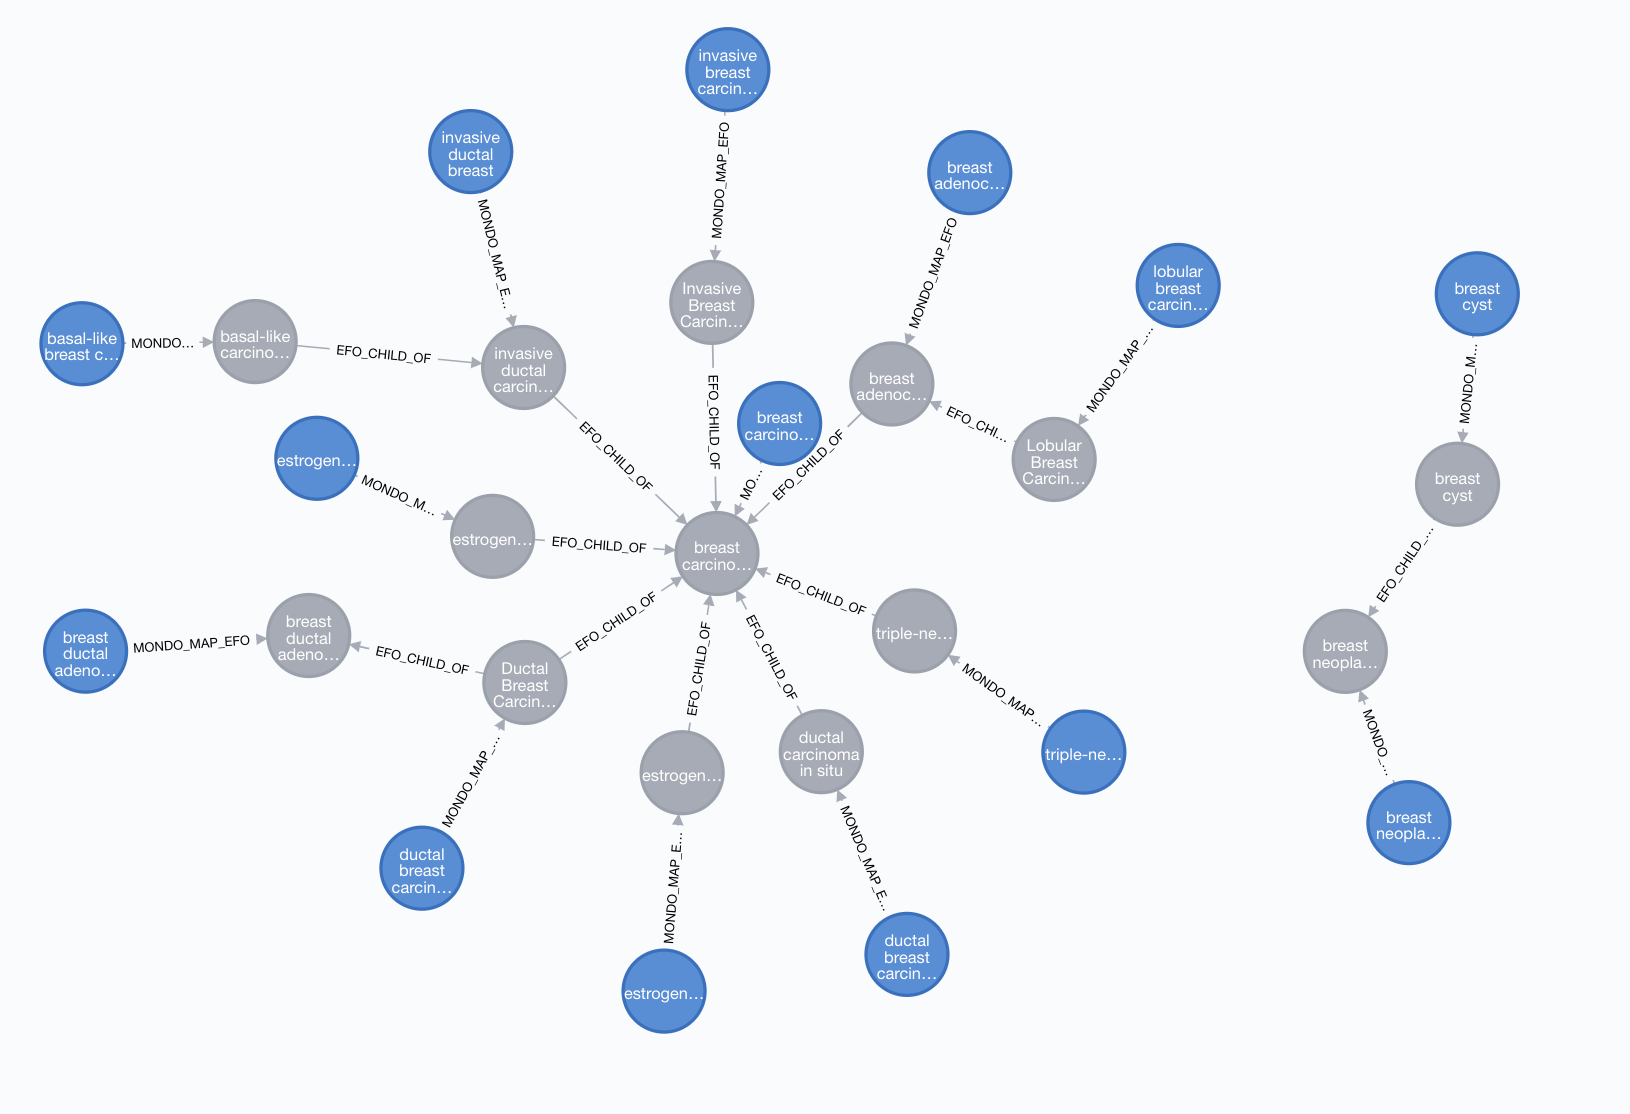

In [24]:
from IPython.display import Image
Image(filename = "figures/breast_carcinoma_efo_disease.png", width = 800)


In [35]:
# these are breast terms (breast-related diseases) that don't have EFO mapping

no_efo_mapping_diseases = list(set(dfx['disease.label'])-set(df['disease.label']))
no_efo_mapping_diseases

['progesterone-receptor negative breast cancer',
 'acinic cell breast carcinoma',
 'malignant breast melanoma',
 'familial juvenile hypertrophy of the breast',
 'rare breast malformation',
 'benign eccrine breast spiradenoma',
 'breast giant fibroadenoma',
 'supernumerary breasts',
 'mixed epithelial/mesenchymal metaplastic breast carcinoma',
 'microscopic breast papilloma',
 'breast myoepitheliosis',
 'intraductal papillary breast neoplasm',
 'spindle cell variant squamous cell breast carcinoma',
 'breast cancer',
 'breast',
 'periductal breast myoepitheliosis',
 'breast epithelium',
 'breast granular cell tumor',
 'breast cystic hypersecretory carcinoma',
 'progesterone-receptor positive breast cancer',
 'hereditary breast ovarian cancer syndrome',
 'breast disease',
 'intraductal breast papillomatosis',
 'hormone-resistant breast carcinoma',
 'breast leiomyoma',
 'isolated congenital breast hypoplasia/aplasia',
 'solid papillary breast carcinoma',
 'female breast nipple and areola c

### Disease - EFO - GWAS

In [16]:
query="""
MATCH (disease:Disease)-[disease_to_efo:MONDO_MAP_EFO]->(efo:Efo)<-[efo_to_gwas:GWAS_NLP_EFO]-(gwas:Gwas)
where toLower(disease.label) contains 'breast'
return  disease.label, efo.id, efo_to_gwas.score, gwas.id, gwas.trait, toInteger(gwas.sample_size) as N, toInteger(gwas.ncase) as n_case 
order by gwas.id
"""
df = query_to_df(query)
df


MATCH (disease:Disease)-[disease_to_efo:MONDO_MAP_EFO]->(efo:Efo)<-[efo_to_gwas:GWAS_NLP_EFO]-(gwas:Gwas)
where toLower(disease.label) contains 'breast'
return  disease.label, efo.id, efo_to_gwas.score, gwas.id, gwas.trait, toInteger(gwas.sample_size) as N, toInteger(gwas.ncase) as n_case 
order by gwas.id



,disease.label,efo.id,efo_to_gwas.score,gwas.id,gwas.trait,N,n_case
0,breast carcinoma,http://www.ebi.ac.uk/efo/EFO_0000305,0.852600,ebi-a-GCST004988,Breast cancer,139274.0,76192
1,triple-negative breast carcinoma,http://www.ebi.ac.uk/efo/EFO_0005537,0.778631,ebi-a-GCST004988,Breast cancer,139274.0,76192
2,breast adenocarcinoma,http://www.ebi.ac.uk/efo/EFO_0000304,0.734440,ebi-a-GCST004988,Breast cancer,139274.0,76192
3,invasive ductal breast carcinoma,http://www.ebi.ac.uk/efo/EFO_0000186,0.709351,ebi-a-GCST004988,Breast cancer,139274.0,76192
4,invasive breast carcinoma,http://www.ebi.ac.uk/efo/EFO_1000307,0.726793,ebi-a-GCST004988,Breast cancer,139274.0,76192
...,...,...,...,...,...,...,...
79,breast neoplasm,http://www.ebi.ac.uk/efo/EFO_0003869,0.843308,ukb-b-8549,Diagnoses - main ICD10: D24 Benign neoplasm of...,463010.0,1244
80,breast neoplasm,http://www.ebi.ac.uk/efo/EFO_0003869,0.819933,ukb-d-C3_BREAST_3,Malignant neoplasm of breast,361194.0,9721
81,ductal breast carcinoma in situ,http://www.ebi.ac.uk/efo/EFO_0000432,0.870516,ukb-d-D05,Diagnoses - main ICD10: D05 Carcinoma in situ ...,361194.0,1454
82,lobular breast carcinoma in situ,http://www.ebi.ac.uk/efo/EFO_1000326,0.828606,ukb-d-D05,Diagnoses - main ICD10: D05 Carcinoma in situ ...,361194.0,1454


## Find what EFO the largest breast cancer GWAS are mapped to

In [17]:
query="""
MATCH (efo:Efo)<-[efo_to_gwas:GWAS_NLP_EFO]-(gwas:Gwas)
where toLower(gwas.trait) contains 'breast'
return gwas.id, gwas.trait,  collect(efo.id) as EFO_IDs, collect (efo.value) as EFO_values,  
        count (efo.value) as N_EFO, toInteger(gwas.sample_size) as N, toInteger(gwas.ncase) as n_case 
order by toInteger(gwas.ncase) desc
"""
df = query_to_df(query)
df


MATCH (efo:Efo)<-[efo_to_gwas:GWAS_NLP_EFO]-(gwas:Gwas)
where toLower(gwas.trait) contains 'breast'
return gwas.id, gwas.trait,  collect(efo.id) as EFO_IDs, collect (efo.value) as EFO_values,  
        count (efo.value) as N_EFO, toInteger(gwas.sample_size) as N, toInteger(gwas.ncase) as n_case 
order by toInteger(gwas.ncase) desc



,gwas.id,gwas.trait,EFO_IDs,EFO_values,N_EFO,N,n_case
0,prot-a-234,Breast cancer anti-estrogen resistance protein 3,[http://www.ebi.ac.uk/efo/EFO_0008040],[breast cancer anti-estrogen resistance protei...,1,3301.0,NaN
1,ebi-a-GCST004988,Breast cancer,"[http://www.ebi.ac.uk/efo/EFO_0000305, http://...","[breast carcinoma, triple-negative breast canc...",13,139274.0,76192.0
2,ieu-a-1129,Breast cancer (Oncoarray),"[http://www.ebi.ac.uk/efo/EFO_0000305, http://...","[breast carcinoma, triple-negative breast canc...",7,106776.0,61282.0
3,ieu-a-1130,Breast cancer (iCOGS),"[http://www.ebi.ac.uk/efo/EFO_0000305, http://...","[breast carcinoma, triple-negative breast canc...",11,89677.0,46785.0
4,ebi-a-GCST007236,Breast cancer,"[http://www.ebi.ac.uk/efo/EFO_0000305, http://...","[breast carcinoma, triple-negative breast canc...",13,89677.0,46785.0
5,ieu-a-1162,Breast cancer (iCOGS),"[http://www.ebi.ac.uk/efo/EFO_0000305, http://...","[breast carcinoma, triple-negative breast canc...",11,89677.0,46785.0
6,ieu-a-1132,ER+ Breast cancer (Oncoarray),[http://www.ebi.ac.uk/efo/EFO_1000649],[estrogen-receptor positive breast cancer],1,83691.0,38197.0
7,ieu-a-1161,ER+ Breast cancer (iCOGS),"[http://www.ebi.ac.uk/efo/EFO_1000649, http://...","[estrogen-receptor positive breast cancer, est...",2,69970.0,27078.0
8,ieu-a-1133,ER+ Breast cancer (iCOGS),"[http://www.ebi.ac.uk/efo/EFO_1000649, http://...","[estrogen-receptor positive breast cancer, est...",2,69970.0,27078.0
9,ukb-b-16890,"Cancer code, self-reported: breast cancer","[http://www.ebi.ac.uk/efo/EFO_0000305, http://...","[breast carcinoma, cancer, estrogen-receptor p...",3,462933.0,10303.0


In [18]:
# now look only at 'ieu-a' GWAS
query="""
MATCH (efo:Efo)<-[efo_to_gwas:GWAS_NLP_EFO]-(gwas:Gwas)
where gwas.id starts with 'ieu-a' and toLower(gwas.trait) contains 'breast'
return gwas.id, gwas.trait,  collect(efo.id) as EFO_IDs, collect (efo.value) as EFO_values, count (efo.value) as N_EFO,
       toInteger(gwas.sample_size) as N, toInteger(gwas.ncase) as n_case , toInteger(gwas.year) as year
order by toInteger(gwas.ncase) desc
"""
df = query_to_df(query)
df

## NB out main GWAS don't have an EFO mapping


MATCH (efo:Efo)<-[efo_to_gwas:GWAS_NLP_EFO]-(gwas:Gwas)
where gwas.id starts with 'ieu-a' and toLower(gwas.trait) contains 'breast'
return gwas.id, gwas.trait,  collect(efo.id) as EFO_IDs, collect (efo.value) as EFO_values, count (efo.value) as N_EFO,
       toInteger(gwas.sample_size) as N, toInteger(gwas.ncase) as n_case , toInteger(gwas.year) as year
order by toInteger(gwas.ncase) desc



,gwas.id,gwas.trait,EFO_IDs,EFO_values,N_EFO,N,n_case,year
0,ieu-a-1129,Breast cancer (Oncoarray),"[http://www.ebi.ac.uk/efo/EFO_1000650, http://...","[estrogen-receptor negative breast cancer, Her...",7,106776,61282,2017
1,ieu-a-1130,Breast cancer (iCOGS),"[http://www.ebi.ac.uk/efo/EFO_0000281, http://...","[basal-like carcinoma, breast ductal adenocarc...",11,89677,46785,2017
2,ieu-a-1162,Breast cancer (iCOGS),"[http://www.ebi.ac.uk/efo/EFO_0000281, http://...","[basal-like carcinoma, breast ductal adenocarc...",11,89677,46785,2015
3,ieu-a-1132,ER+ Breast cancer (Oncoarray),[http://www.ebi.ac.uk/efo/EFO_1000649],[estrogen-receptor positive breast cancer],1,83691,38197,2017
4,ieu-a-1133,ER+ Breast cancer (iCOGS),"[http://www.ebi.ac.uk/efo/EFO_1000650, http://...","[estrogen-receptor negative breast cancer, est...",2,69970,27078,2017
5,ieu-a-1161,ER+ Breast cancer (iCOGS),"[http://www.ebi.ac.uk/efo/EFO_1000650, http://...","[estrogen-receptor negative breast cancer, est...",2,69970,27078,2015
6,ieu-a-1135,ER- Breast cancer (Oncoarray),"[http://www.ebi.ac.uk/efo/EFO_0000305, http://...","[breast carcinoma, triple-negative breast canc...",4,55149,9655,2017
7,ieu-a-1136,ER- Breast cancer (iCOGS),"[http://www.ebi.ac.uk/efo/EFO_0005607, http://...","[breast cancer stage, basal-like carcinoma, br...",6,50225,7333,2017
8,ieu-a-1160,ER- Breast cancer (iCOGS),"[http://www.ebi.ac.uk/efo/EFO_0005607, http://...","[breast cancer stage, basal-like carcinoma, br...",6,50225,7333,2015
9,ieu-a-1163,ER- Breast cancer (Survival),[http://www.ebi.ac.uk/efo/EFO_1000649],[estrogen-receptor positive breast cancer],1,6881,920,2015


In [19]:
# showing the EFO assignments for the next largest GWAS
query="""
MATCH (efo:Efo)<-[efo_to_gwas:GWAS_NLP_EFO]-(gwas:Gwas)
where gwas.id in ['ieu-a-1129', 'ieu-a-1132', 'ieu-a-1135']
SET gwas.name = gwas.`_name`
SET efo.name = efo.`_name`
return gwas.id,gwas.trait,  efo.id, efo.value, efo_to_gwas.score
order by gwas.id"""

df = query_to_df(query)
df


MATCH (efo:Efo)<-[efo_to_gwas:GWAS_NLP_EFO]-(gwas:Gwas)
where gwas.id in ['ieu-a-1129', 'ieu-a-1132', 'ieu-a-1135']
SET gwas.name = gwas.`_name`
SET efo.name = efo.`_name`
return gwas.id,gwas.trait,  efo.id, efo.value, efo_to_gwas.score
order by gwas.id


,gwas.id,gwas.trait,efo.id,efo.value,efo_to_gwas.score
0,ieu-a-1129,Breast cancer (Oncoarray),http://www.ebi.ac.uk/efo/EFO_1000650,estrogen-receptor negative breast cancer,0.701004
1,ieu-a-1129,Breast cancer (Oncoarray),http://www.orpha.net/ORDO/Orphanet_227535,Hereditary breast cancer,0.702555
2,ieu-a-1129,Breast cancer (Oncoarray),http://www.ebi.ac.uk/efo/EFO_0000304,breast adenocarcinoma,0.710287
3,ieu-a-1129,Breast cancer (Oncoarray),http://www.ebi.ac.uk/efo/EFO_0005607,breast cancer stage,0.713407
4,ieu-a-1129,Breast cancer (Oncoarray),http://www.ebi.ac.uk/efo/EFO_0005537,triple-negative breast cancer,0.715045
5,ieu-a-1129,Breast cancer (Oncoarray),http://www.ebi.ac.uk/efo/EFO_1000649,estrogen-receptor positive breast cancer,0.737351
6,ieu-a-1129,Breast cancer (Oncoarray),http://www.ebi.ac.uk/efo/EFO_0000305,breast carcinoma,0.801407
7,ieu-a-1132,ER+ Breast cancer (Oncoarray),http://www.ebi.ac.uk/efo/EFO_1000649,estrogen-receptor positive breast cancer,0.718764
8,ieu-a-1135,ER- Breast cancer (Oncoarray),http://www.ebi.ac.uk/efo/EFO_0000305,breast carcinoma,0.732981
9,ieu-a-1135,ER- Breast cancer (Oncoarray),http://www.ebi.ac.uk/efo/EFO_0005537,triple-negative breast cancer,0.743182


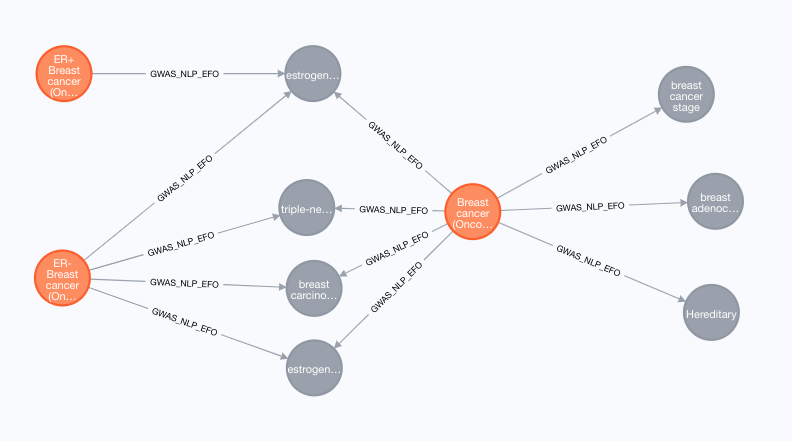

In [8]:
from IPython.display import Image
Image(filename = "gwas_efo.png", width = 800)

##  Disease label =  EFO ?  and GWAS name

In [20]:
# is it alaways same as EFO?
query="""
MATCH (gwas:Gwas)-[gwas_to_efo:GWAS_NLP_EFO]->(efo:Efo)<-[efo_disease:MONDO_MAP_EFO]-(disease:Disease) 
WHERE gwas_to_efo.score > 0.5 AND gwas.id = "ieu-a-1129" 
RETURN gwas.id, gwas.trait, gwas_to_efo.score,  efo.value, efo.id,  disease.label 
order by gwas_to_efo.score desc
"""

df = query_to_df(query)
df


MATCH (gwas:Gwas)-[gwas_to_efo:GWAS_NLP_EFO]->(efo:Efo)<-[efo_disease:MONDO_MAP_EFO]-(disease:Disease) 
WHERE gwas_to_efo.score > 0.5 AND gwas.id = "ieu-a-1129" 
RETURN gwas.id, gwas.trait, gwas_to_efo.score,  efo.value, efo.id,  disease.label 
order by gwas_to_efo.score desc



,gwas.id,gwas.trait,gwas_to_efo.score,efo.value,efo.id,disease.label
0,ieu-a-1129,Breast cancer (Oncoarray),0.801407,breast carcinoma,http://www.ebi.ac.uk/efo/EFO_0000305,breast carcinoma
1,ieu-a-1129,Breast cancer (Oncoarray),0.737351,estrogen-receptor positive breast cancer,http://www.ebi.ac.uk/efo/EFO_1000649,estrogen-receptor positive breast cancer
2,ieu-a-1129,Breast cancer (Oncoarray),0.715045,triple-negative breast cancer,http://www.ebi.ac.uk/efo/EFO_0005537,triple-negative breast carcinoma
3,ieu-a-1129,Breast cancer (Oncoarray),0.710287,breast adenocarcinoma,http://www.ebi.ac.uk/efo/EFO_0000304,breast adenocarcinoma
4,ieu-a-1129,Breast cancer (Oncoarray),0.701004,estrogen-receptor negative breast cancer,http://www.ebi.ac.uk/efo/EFO_1000650,estrogen-receptor negative breast cancer
